In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inpPath = "C:/CarolineZiegler/Studium_DCU/7. Semester/Business Strategy/"
BS_Df = pd.read_csv(inpPath + "Music Streaming Survey Raw Data.csv", delimiter = ",")
BS_Df

,Timestamp,What is your gender?,What is your age group?,What is your Country of Residence?,Are you subscribed to a music streaming platform?,Why do you not use music streaming? (multiple answers possible),Which channels do you use instead? (you can finish this survey after this question),Which platform do you use mainly?,Why do you use this platform?,Which subscription model do you use?,...,"What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Personalized Recommendations]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Vast Music Library]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Exact Search and Discovery]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Enhanced Artist Pages (e.g., biography)]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [User Reviews and Ratings]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Launch A Mix Inspired By A Song You Love]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Change Your Country Recommendations ]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Flow (moods, genres) ]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Song catcher (tracks and/or humming)]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Music Quizz ]"
0,2023/11/17 1:04:04 pm CET,Female,16-24,Ireland,Yes,NaN,NaN,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it
1,2023/11/17 1:56:19 pm CET,Female,16-24,Germany,Yes,NaN,NaN,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),...,Must-have,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have
2,2023/11/17 1:57:10 pm CET,Female,16-24,Ireland,Yes,NaN,NaN,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),...,Must-have,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it
3,2023/11/17 2:05:28 pm CET,Male,16-24,Ireland,Yes,NaN,NaN,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),...,Nice-to-have,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it
4,2023/11/17 2:09:12 pm CET,Male,45-54,Heuss,Yes,NaN,NaN,Deezer,Subscription plan,Premium (Family),...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2023/11/28 3:53:08 pm CET,Female,16-24,Germany,Yes,NaN,NaN,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),...,Nice-to-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it
123,2023/11/29 7:56:36 pm CET,Female,45-54,Germany,Yes,NaN,NaN,Spotify,Price;Easy usage,Free,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it
124,2023/11/29 8:01:20 pm CET,Male,45-54,Deutschland,Yes,NaN,NaN,Amazon Music,Easy usage,Part of Amazon Prime,...,Don´t need it,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-h

In [3]:
#The survey was conducted using Google Forms, which means that questions with a selection can already be evaluated very well in Google Forms. In this respect, Python is mainly used to clean the data, extract the customers and non-customers data sets and analyze the free-form texts. Consequently, not every column of the data set was analyzed in Python, but the gaps from Google Forms were filled by Python. 

In [4]:
BS_Df.drop("Timestamp", inplace = True, axis =1)
BS_Df

,What is your gender?,What is your age group?,What is your Country of Residence?,Are you subscribed to a music streaming platform?,Why do you not use music streaming? (multiple answers possible),Which channels do you use instead? (you can finish this survey after this question),Which platform do you use mainly?,Why do you use this platform?,Which subscription model do you use?,How often do you use music streaming?,...,"What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Personalized Recommendations]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Vast Music Library]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Exact Search and Discovery]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Enhanced Artist Pages (e.g., biography)]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [User Reviews and Ratings]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Launch A Mix Inspired By A Song You Love]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Change Your Country Recommendations ]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Flow (moods, genres) ]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Song catcher (tracks and/or humming)]","What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Music Quizz ]"
0,Female,16-24,Ireland,Yes,NaN,NaN,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it
1,Female,16-24,Germany,Yes,NaN,NaN,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,...,Must-have,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have
2,Female,16-24,Ireland,Yes,NaN,NaN,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,...,Must-have,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it
3,Male,16-24,Ireland,Yes,NaN,NaN,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it
4,Male,45-54,Heuss,Yes,NaN,NaN,Deezer,Subscription plan,Premium (Family),Once a week,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Female,16-24,Germany,Yes,NaN,NaN,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it
123,Female,45-54,Germany,Yes,NaN,NaN,Spotify,Price;Easy usage,Free,Rarely,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it
124,Male,45-54,Deutschland,Yes,NaN,NaN,Amazon Music,Easy usage,Part of Amazon Prime,A few times a month,...,Don´t need it,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have
125,Fe

In [5]:
BS_Df.columns

Index(['What is your gender?', 'What is your age group?',
       'What is your Country of Residence?',
       'Are you subscribed to a music streaming platform?',
       'Why do you not use music streaming? (multiple answers possible)',
       'Which channels do you use instead? (you can finish this survey after this question)',
       'Which platform do you use mainly?', 'Why do you use this platform?',
       'Which subscription model do you use?',
       'How often do you use music streaming?',
       'On which devices do you use music streaming services?',
       'When do you use music streaming services?',
       'How satisfied are you with your current music streaming platform?',
       'I am satisfied, because...', 'I am not satisfied, because...',
       'Which of the following interfaces do you find most appealing?',
       'What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [High-quality audio ]',
       'W

In [6]:
BS_Df.rename(columns = {"What is your gender?": "Gender", 
                        "What is your age group?":"Age Group", 
                        "What is your Country of Residence?": "Residence", 
                        "Are you subscribed to a music streaming platform?":"Music Streaming Subscription", 
                        "Why do you not use music streaming? (multiple answers possible)":"Reasons Non-Customers", 
                        "Which channels do you use instead? (you can finish this survey after this question)":"Music Listening by Non-Customers", 
                        "Which platform do you use mainly?":"Music Streaming Platform", 
                        "Why do you use this platform?":"Reasons for Platform",
                        "How often do you use music streaming?": "Music Streaming Frequency",
                        "Which subscription model do you use?":"Subscription Model",
                        "On which devices do you use music streaming services?": "Music Streaming Devices",
                        "When do you use music streaming services?": "Music Streaming Occasions",
                        "How satisfied are you with your current music streaming platform?": "Platform Satisfaction",
                        "I am satisfied, because...": "Reasons for Satisfaction",
                        "I am not satisfied, because...": "Reasons for Dissatisfaction",
                        "Which of the following interfaces do you find most appealing?": "Interface Appeal",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [High-quality audio ]": "High-quality Audio",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Cross-Platform Syncing ]": "Cross-Platform Syncing",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Shared Playlists ]": "Shared Playlists",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Live Lyrics Integration]": "Live Lyrics Integration",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Smart Speaker Integration]": "Smart Speaker Integration",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Concert & Event Integration]": "Concert & Event Integration",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Podcast]": "Podcast",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Offline Mode]": "Offline Mode",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Live Streaming Events]": "Live Streaming Events",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Sleep Timer]": "Sleep Timer",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Genre-Based Radio Stations ]": "Genre-Based Radio Stations",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Music Videos]": "Music Videos",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Personalized Recommendations]": "Personalized Recommendations", 
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Vast Music Library]":"Vast Music Library", 
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Exact Search and Discovery]":"Exact Search and Discovery", 
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Enhanced Artist Pages (e.g., biography)]":"Enhances Artist Pages", 
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [User Reviews and Ratings]":"User Reviews and Ratings", 
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Launch A Mix Inspired By A Song You Love]":"Launch a Mix", 
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Change Your Country Recommendations ]":"Change Country Recommendations", 
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Flow (moods, genres) ]":"Flow", 
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Song catcher (tracks and/or humming)]":"Song Catcher",
                        "What do you consider must-have, nice-to-have features on a music streaming platform and what do you personally not need? [Music Quizz ]": "Music Quiz"}, inplace = True)
BS_Df

,Gender,Age Group,Residence,Music Streaming Subscription,Reasons Non-Customers,Music Listening by Non-Customers,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,...,Personalized Recommendations,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz
0,Female,16-24,Ireland,Yes,NaN,NaN,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it
1,Female,16-24,Germany,Yes,NaN,NaN,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,...,Must-have,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have
2,Female,16-24,Ireland,Yes,NaN,NaN,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,...,Must-have,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it
3,Male,16-24,Ireland,Yes,NaN,NaN,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it
4,Male,45-54,Heuss,Yes,NaN,NaN,Deezer,Subscription plan,Premium (Family),Once a week,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Female,16-24,Germany,Yes,NaN,NaN,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it
123,Female,45-54,Germany,Yes,NaN,NaN,Spotify,Price;Easy usage,Free,Rarely,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it
124,Male,45-54,Deutschland,Yes,NaN,NaN,Amazon Music,Easy usage,Part of Amazon Prime,A few times a month,...,Don´t need it,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have
125,Female,16-24,Germany,No,"I prefer physical ownership (CD, Vynil)",Radio;CDs;Youtube,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
BS_Df["Interface Appeal"]

0       Apple Music
1           Spotify
2           Spotify
3           Spotify
4            Deezer
           ...     
122         Spotify
123     Apple Music
124         Spotify
125             NaN
126    Google Music
Name: Interface Appeal, Length: 127, dtype: object

In [8]:
BS_Df["Residence"].unique()

array(['Ireland', 'Germany', 'Heuss', 'Ireland ', 'Netherlands',
       'ireland', 'France ', 'Canada', 'Brazil', 'United Kingdom', 'UK',
       'Germany ', 'france', 'Italy', 'Austria ', 'Switzerland / Germany',
       'China', 'germany', 'Netherlands ', 'Czech Republic ', 'Austria',
       'Switzerland', 'Poland ', 'Belgium ', 'Belgique', 'Berlin',
       'France', 'ITALY', 'Belgium', 'US', 'Spain', 'Kildare',
       'Deutschland'], dtype=object)

In [9]:
BS_Df["Residence"] = BS_Df["Residence"].str.capitalize()
BS_Df["Residence"].unique()

array(['Ireland', 'Germany', 'Heuss', 'Ireland ', 'Netherlands',
       'France ', 'Canada', 'Brazil', 'United kingdom', 'Uk', 'Germany ',
       'France', 'Italy', 'Austria ', 'Switzerland / germany', 'China',
       'Netherlands ', 'Czech republic ', 'Austria', 'Switzerland',
       'Poland ', 'Belgium ', 'Belgique', 'Berlin', 'Belgium', 'Us',
       'Spain', 'Kildare', 'Deutschland'], dtype=object)

In [10]:
BS_Df["Residence"].replace("Heuss", "Germany", inplace = True)
BS_Df["Residence"].unique()

array(['Ireland', 'Germany', 'Ireland ', 'Netherlands', 'France ',
       'Canada', 'Brazil', 'United kingdom', 'Uk', 'Germany ', 'France',
       'Italy', 'Austria ', 'Switzerland / germany', 'China',
       'Netherlands ', 'Czech republic ', 'Austria', 'Switzerland',
       'Poland ', 'Belgium ', 'Belgique', 'Berlin', 'Belgium', 'Us',
       'Spain', 'Kildare', 'Deutschland'], dtype=object)

In [11]:
BS_Df["Residence"].replace("Berlin", "Germany", inplace = True)
BS_Df["Residence"].unique()

array(['Ireland', 'Germany', 'Ireland ', 'Netherlands', 'France ',
       'Canada', 'Brazil', 'United kingdom', 'Uk', 'Germany ', 'France',
       'Italy', 'Austria ', 'Switzerland / germany', 'China',
       'Netherlands ', 'Czech republic ', 'Austria', 'Switzerland',
       'Poland ', 'Belgium ', 'Belgique', 'Belgium', 'Us', 'Spain',
       'Kildare', 'Deutschland'], dtype=object)

In [12]:
BS_Df["Residence"].replace("Deutschland", "Germany", inplace = True)
BS_Df["Residence"].replace('Germany ', "Germany", inplace = True)
BS_Df["Residence"].replace('Ireland ', "Ireland", inplace = True)
BS_Df["Residence"].replace('France ', "France", inplace = True)
BS_Df["Residence"].replace('United kingdom', "United Kingdom", inplace = True)
BS_Df["Residence"].replace('Uk', "United Kingdom", inplace = True)
BS_Df["Residence"].replace('Austria ', "Austria", inplace = True)
BS_Df["Residence"].replace('Switzerland / germany', "Switzerland & Germany", inplace = True)
BS_Df["Residence"].replace('Netherlands ', "Netherlands", inplace = True)
BS_Df["Residence"].replace('Czech republic ', "Czech Republic", inplace = True)
BS_Df["Residence"].replace('Belgium ', "Belgium", inplace = True)
BS_Df["Residence"].replace('Belgique', "Belgium", inplace = True)
BS_Df["Residence"].replace('Us', "USA", inplace = True)
BS_Df["Residence"].replace('Kildare', "Ireland", inplace = True)
BS_Df["Residence"].unique()

array(['Ireland', 'Germany', 'Netherlands', 'France', 'Canada', 'Brazil',
       'United Kingdom', 'Italy', 'Austria', 'Switzerland & Germany',
       'China', 'Czech Republic', 'Switzerland', 'Poland ', 'Belgium',
       'USA', 'Spain'], dtype=object)

In [13]:
BS_Df

,Gender,Age Group,Residence,Music Streaming Subscription,Reasons Non-Customers,Music Listening by Non-Customers,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,...,Personalized Recommendations,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz
0,Female,16-24,Ireland,Yes,NaN,NaN,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it
1,Female,16-24,Germany,Yes,NaN,NaN,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,...,Must-have,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have
2,Female,16-24,Ireland,Yes,NaN,NaN,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,...,Must-have,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it
3,Male,16-24,Ireland,Yes,NaN,NaN,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it
4,Male,45-54,Germany,Yes,NaN,NaN,Deezer,Subscription plan,Premium (Family),Once a week,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Female,16-24,Germany,Yes,NaN,NaN,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it
123,Female,45-54,Germany,Yes,NaN,NaN,Spotify,Price;Easy usage,Free,Rarely,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it
124,Male,45-54,Germany,Yes,NaN,NaN,Amazon Music,Easy usage,Part of Amazon Prime,A few times a month,...,Don´t need it,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have
125,Female,16-24,Germany,No,"I prefer physical ownership (CD, Vynil)",Radio;CDs;Youtube,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


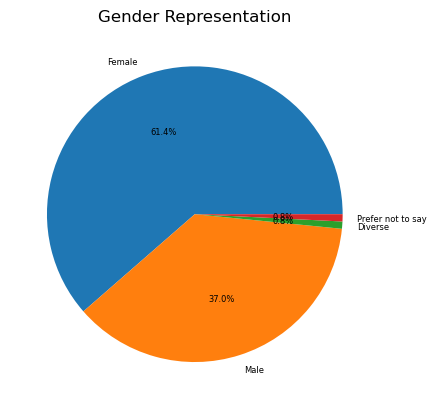

In [14]:
gender_counts = BS_Df["Gender"].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Gender Representation')
plt.show()

In [15]:
gender_counts

Female               78
Male                 47
Diverse               1
Prefer not to say     1
Name: Gender, dtype: int64

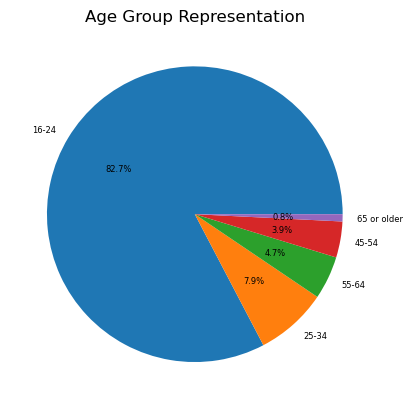

In [16]:
age_counts = BS_Df["Age Group"].value_counts()

plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Age Group Representation')
plt.show()

In [17]:
age_counts

16-24          105
25-34           10
55-64            6
45-54            5
65 or older      1
Name: Age Group, dtype: int64

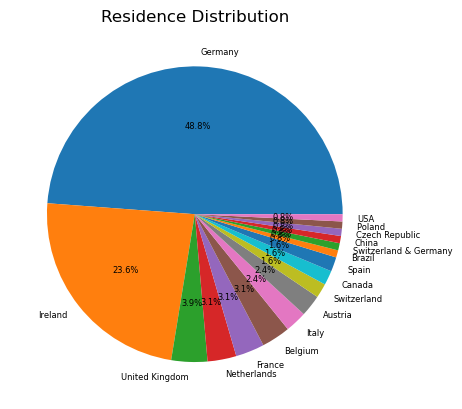

In [18]:
residence_counts = BS_Df["Residence"].value_counts()

plt.pie(residence_counts, labels=residence_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Residence Distribution')
plt.show()

In [19]:
residence_counts

Germany                  62
Ireland                  30
United Kingdom            5
Netherlands               4
France                    4
Belgium                   4
Italy                     3
Austria                   3
Switzerland               2
Canada                    2
Spain                     2
Brazil                    1
Switzerland & Germany     1
China                     1
Czech Republic            1
Poland                    1
USA                       1
Name: Residence, dtype: int64

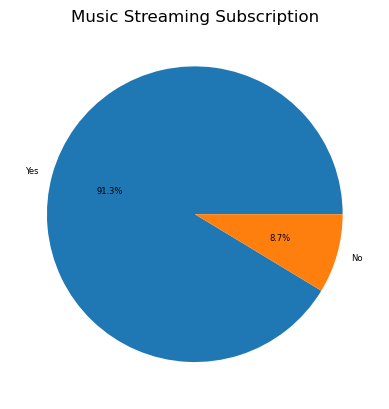

In [20]:
MS_counts = BS_Df["Music Streaming Subscription"].value_counts()

plt.pie(MS_counts, labels=MS_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Music Streaming Subscription')
plt.show()

In [21]:
MS_counts

Yes    116
No      11
Name: Music Streaming Subscription, dtype: int64

In [22]:
non_customers = BS_Df[["Gender", "Age Group", "Residence", "Music Streaming Subscription", "Reasons Non-Customers", "Music Listening by Non-Customers"]]
non_customers

,Gender,Age Group,Residence,Music Streaming Subscription,Reasons Non-Customers,Music Listening by Non-Customers
0,Female,16-24,Ireland,Yes,NaN,NaN
1,Female,16-24,Germany,Yes,NaN,NaN
2,Female,16-24,Ireland,Yes,NaN,NaN
3,Male,16-24,Ireland,Yes,NaN,NaN
4,Male,45-54,Germany,Yes,NaN,NaN
...,...,...,...,...,...,...
122,Female,16-24,Germany,Yes,NaN,NaN
123,Female,45-54,Germany,Yes,NaN,NaN
124,Male,45-54,Germany,Yes,NaN,NaN
125,Female,16-24,Germany,No,"I prefer physical ownership (CD, Vynil)",Radio;CDs;Youtube


In [23]:
non_customers_df = non_customers[non_customers['Music Streaming Subscription'] == 'No']
non_customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Reasons Non-Customers,Music Listening by Non-Customers
8,Male,16-24,Netherlands,No,Too prices,Digital Downloads;Youtube;Free version of subs...
15,Female,16-24,Germany,No,Too prices,Digital Downloads;Youtube;Spotify free
20,Male,16-24,United Kingdom,No,Too prices;I am not very interested in music,I don´t listen to music
43,Male,16-24,Germany,No,Too pricey;Freemium is sufficient for mee,Radio;Youtube;Freemium Spotify
52,Male,16-24,Germany,No,Too pricey,Radio;Vynil records;Digital Downloads;Youtube
80,Male,25-34,United Kingdom,No,"Too pricey;I prefer physical ownership (CD, Vy...",Radio;Digital Downloads
82,Diverse,65 or older,Germany,No,Heinz,I don´t listen to music
88,Male,16-24,Germany,No,Too pricey,Radio;Youtube;Concerts
89,Female,55-64,Italy,No,I never really thought about it,Radio
99,Male,55-64,Germany,No,Too pricey;I never really thought about it,Radio;Digital Downloads;Concerts


In [24]:
non_customers_df["Reasons Non-Customers"].unique()

array(['Too prices', 'Too prices;I am not very interested in music',
       'Too pricey;Freemium is sufficient for mee', 'Too pricey',
       'Too pricey;I prefer physical ownership (CD, Vynil)', 'Heinz',
       'I never really thought about it',
       'Too pricey;I never really thought about it',
       'I prefer physical ownership (CD, Vynil)'], dtype=object)

In [25]:
non_customers_df["Reasons Non-Customers"].replace("Too prices", "Price (expensive)", inplace = True)
non_customers_df["Reasons Non-Customers"].replace('Too pricey', "Price (expensive)", inplace = True)
non_customers_df["Reasons Non-Customers"].replace("Too prices;I am not very interested in music", "Price & No Music Interest", inplace = True)
non_customers_df["Reasons Non-Customers"].replace("Too pricey;Freemium is sufficient for mee", "Price (expensive)", inplace = True)
non_customers_df["Reasons Non-Customers"].replace('Too pricey;I prefer physical ownership (CD, Vynil)', "Price & Physical Ownership", inplace = True)
non_customers_df["Reasons Non-Customers"].replace('I never really thought about it', "Not Considered Yet", inplace = True)
non_customers_df["Reasons Non-Customers"].replace("Heinz", "n/a", inplace = True)
non_customers_df["Reasons Non-Customers"].replace('Too pricey;I never really thought about it', "Price & Not Considered", inplace = True)
non_customers_df["Reasons Non-Customers"].replace('I prefer physical ownership (CD, Vynil)', "Physical Ownership", inplace = True)
non_customers_df["Reasons Non-Customers"].unique()

C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\4105132275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_customers_df["Reasons Non-Customers"].replace("Too prices", "Price (expensive)", inplace = True)
C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\4105132275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_customers_df["Reasons Non-Customers"].replace('Too pricey', "Price (expensive)", inplace = True)
C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\4105132275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

array(['Price (expensive)', 'Price & No Music Interest',
       'Price & Physical Ownership', 'n/a', 'Not Considered Yet',
       'Price & Not Considered', 'Physical Ownership'], dtype=object)

In [26]:
non_customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Reasons Non-Customers,Music Listening by Non-Customers
8,Male,16-24,Netherlands,No,Price (expensive),Digital Downloads;Youtube;Free version of subs...
15,Female,16-24,Germany,No,Price (expensive),Digital Downloads;Youtube;Spotify free
20,Male,16-24,United Kingdom,No,Price & No Music Interest,I don´t listen to music
43,Male,16-24,Germany,No,Price (expensive),Radio;Youtube;Freemium Spotify
52,Male,16-24,Germany,No,Price (expensive),Radio;Vynil records;Digital Downloads;Youtube
80,Male,25-34,United Kingdom,No,Price & Physical Ownership,Radio;Digital Downloads
82,Diverse,65 or older,Germany,No,n/a,I don´t listen to music
88,Male,16-24,Germany,No,Price (expensive),Radio;Youtube;Concerts
89,Female,55-64,Italy,No,Not Considered Yet,Radio
99,Male,55-64,Germany,No,Price & Not Considered,Radio;Digital Downloads;Concerts


In [27]:
non_customers_df["Music Listening by Non-Customers"].unique()

array(['Digital Downloads;Youtube;Free version of subscription services',
       'Digital Downloads;Youtube;Spotify free',
       'I don´t listen to music', 'Radio;Youtube;Freemium Spotify',
       'Radio;Vynil records;Digital Downloads;Youtube',
       'Radio;Digital Downloads', 'Radio;Youtube;Concerts', 'Radio',
       'Radio;Digital Downloads;Concerts', 'Radio;CDs;Youtube'],
      dtype=object)

In [28]:
non_customers_df["Music Listening by Non-Customers"].replace('Digital Downloads;Youtube;Free version of subscription services', "Digital Downloads & Freemium", inplace = True)
non_customers_df["Music Listening by Non-Customers"].replace('Digital Downloads;Youtube;Spotify free', "Digital Downloads & Freemium", inplace = True)
non_customers_df["Music Listening by Non-Customers"].replace('I don´t listen to music', "No Music Listening", inplace = True)
non_customers_df["Music Listening by Non-Customers"].replace('Radio;Youtube;Freemium Spotify', "Radio & Freemium", inplace = True)
non_customers_df["Music Listening by Non-Customers"].replace('Radio;Vynil records;Digital Downloads;Youtube', "Radio, Vynil & Digital Downloads", inplace = True)
non_customers_df["Music Listening by Non-Customers"].replace('Radio;Digital Downloads', "Radio & Freemium", inplace = True)
non_customers_df["Music Listening by Non-Customers"].replace('Radio;Youtube;Concerts', "Radio, Concerts & Freemium", inplace = True)
non_customers_df["Music Listening by Non-Customers"].replace('Radio;Digital Downloads;Concerts', "Radio, Concerts & Freemium", inplace = True)
non_customers_df["Music Listening by Non-Customers"].replace('Radio;CDs;Youtube', "Radio, Vynil & Digital Downloads", inplace = True)
non_customers_df["Music Listening by Non-Customers"].unique()

C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\2343813047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_customers_df["Music Listening by Non-Customers"].replace('Digital Downloads;Youtube;Free version of subscription services', "Digital Downloads & Freemium", inplace = True)
C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\2343813047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_customers_df["Music Listening by Non-Customers"].replace('Digital Downloads;Youtube;Spotify free', "Digital Downloads & Freemium", inplace = True)
C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\2343813047.py:3: SettingWithCopy

array(['Digital Downloads & Freemium', 'No Music Listening',
       'Radio & Freemium', 'Radio, Vynil & Digital Downloads',
       'Radio, Concerts & Freemium', 'Radio'], dtype=object)

In [29]:
non_customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Reasons Non-Customers,Music Listening by Non-Customers
8,Male,16-24,Netherlands,No,Price (expensive),Digital Downloads & Freemium
15,Female,16-24,Germany,No,Price (expensive),Digital Downloads & Freemium
20,Male,16-24,United Kingdom,No,Price & No Music Interest,No Music Listening
43,Male,16-24,Germany,No,Price (expensive),Radio & Freemium
52,Male,16-24,Germany,No,Price (expensive),"Radio, Vynil & Digital Downloads"
80,Male,25-34,United Kingdom,No,Price & Physical Ownership,Radio & Freemium
82,Diverse,65 or older,Germany,No,n/a,No Music Listening
88,Male,16-24,Germany,No,Price (expensive),"Radio, Concerts & Freemium"
89,Female,55-64,Italy,No,Not Considered Yet,Radio
99,Male,55-64,Germany,No,Price & Not Considered,"Radio, Concerts & Freemium"


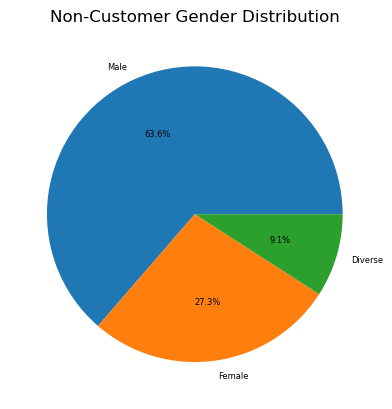

In [30]:
nc_gender_counts = non_customers_df["Gender"].value_counts()

plt.pie(nc_gender_counts, labels=nc_gender_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Non-Customer Gender Distribution')
plt.show()

In [31]:
nc_gender_counts

Male       7
Female     3
Diverse    1
Name: Gender, dtype: int64

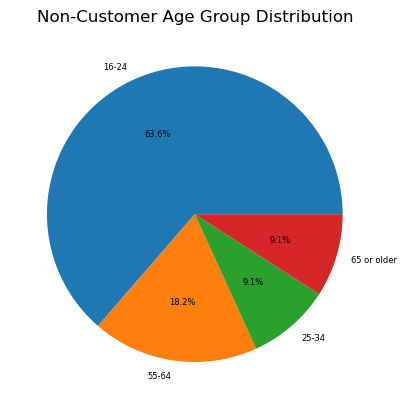

In [32]:
nc_age_counts = non_customers_df["Age Group"].value_counts()

plt.pie(nc_age_counts, labels=nc_age_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Non-Customer Age Group Distribution')
plt.show()

In [33]:
nc_age_counts

16-24          7
55-64          2
25-34          1
65 or older    1
Name: Age Group, dtype: int64

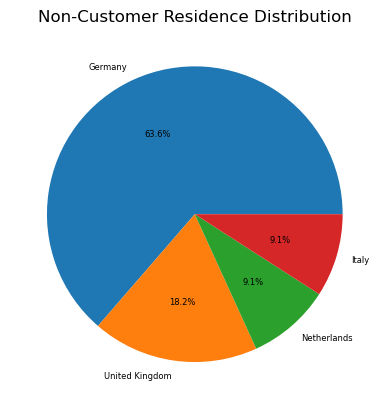

In [34]:
nc_residence_counts = non_customers_df["Residence"].value_counts()

plt.pie(nc_residence_counts, labels=nc_residence_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Non-Customer Residence Distribution')
plt.show()

In [35]:
nc_residence_counts

Germany           7
United Kingdom    2
Netherlands       1
Italy             1
Name: Residence, dtype: int64

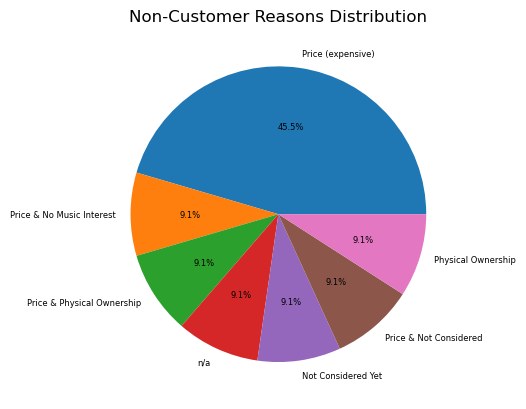

In [36]:
nc_reasons_counts = non_customers_df["Reasons Non-Customers"].value_counts()

plt.pie(nc_reasons_counts, labels=nc_reasons_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Non-Customer Reasons Distribution')
plt.show()

In [37]:
nc_reasons_counts

Price (expensive)             5
Price & No Music Interest     1
Price & Physical Ownership    1
n/a                           1
Not Considered Yet            1
Price & Not Considered        1
Physical Ownership            1
Name: Reasons Non-Customers, dtype: int64

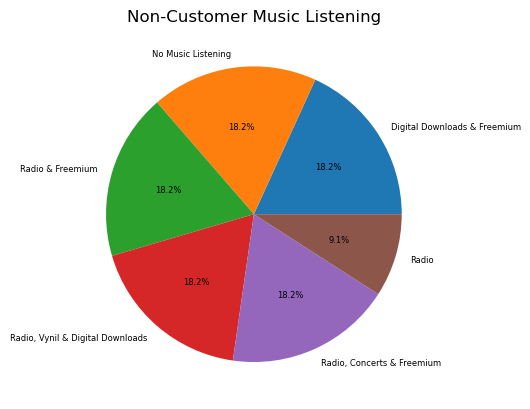

In [38]:
nc_ML_counts = non_customers_df["Music Listening by Non-Customers"].value_counts()

plt.pie(nc_ML_counts, labels=nc_ML_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Non-Customer Music Listening')
plt.show()

In [39]:
nc_ML_counts

Digital Downloads & Freemium        2
No Music Listening                  2
Radio & Freemium                    2
Radio, Vynil & Digital Downloads    2
Radio, Concerts & Freemium          2
Radio                               1
Name: Music Listening by Non-Customers, dtype: int64

In [40]:
customers_columns = ["Gender", 
                     "Age Group", 
                     "Residence", 
                     "Music Streaming Subscription", 
                     "Music Streaming Platform",
                     "Reasons for Platform", 
                     "Subscription Model", 
                     "Music Streaming Frequency",
                     "Music Streaming Devices",
                     "Music Streaming Occasions",
                     "Platform Satisfaction",
                     "Reasons for Satisfaction",
                     "Reasons for Dissatisfaction",
                     "Interface Appeal",
                     "High-quality Audio",
                     "Cross-Platform Syncing",
                     "Shared Playlists",
                     "Live Lyrics Integration",
                     "Smart Speaker Integration",
                     "Concert & Event Integration",
                     "Podcast",
                     "Offline Mode",
                     "Live Streaming Events",
                     "Sleep Timer",
                     "Genre-Based Radio Stations",
                     "Music Videos",
                     "Personalized Recommendations", 
                     "Vast Music Library", 
                     "Exact Search and Discovery",
                     "Enhances Artist Pages", 
                     "User Reviews and Ratings",
                     "Launch a Mix",
                     "Change Country Recommendations",
                     "Flow",
                     "Song Catcher",
                     "Music Quiz"]

In [41]:
customers_df = BS_Df[customers_columns]
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Personalized Recommendations,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Part of Amazon Prime,A few times a month,Sonos,Household work,...,Don´t need it,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have
125,Female,16-24,Germany,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
customers_df = customers_df[customers_df['Music Streaming Subscription'] == 'Yes']
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Personalized Recommendations,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Part of Amazon Prime,A few times a month,Sonos,Household work,...,Don´t need it,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have


In [43]:
customers_df['Music Streaming Subscription'].unique()

array(['Yes'], dtype=object)

In [44]:
customers_df['Music Streaming Platform'].unique()

array(['Apple Music', 'Spotify', 'Deezer', 'SoundCloud ', 'Idagio',
       'SoundCloud (although i pay for spotify and not soundcloud)',
       'Amazon prime', 'Amazon Music'], dtype=object)

In [45]:
customers_df["Music Streaming Platform"].replace('SoundCloud (although i pay for spotify and not soundcloud)', "SoundCloud", inplace = True)
customers_df["Music Streaming Platform"].replace('Amazon prime', "Amazon Music", inplace = True)
customers_df['Music Streaming Platform'].unique()

C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\2580756118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df["Music Streaming Platform"].replace('SoundCloud (although i pay for spotify and not soundcloud)', "SoundCloud", inplace = True)
C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\2580756118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df["Music Streaming Platform"].replace('Amazon prime', "Amazon Music", inplace = True)


array(['Apple Music', 'Spotify', 'Deezer', 'SoundCloud ', 'Idagio',
       'SoundCloud', 'Amazon Music'], dtype=object)

In [46]:
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Personalized Recommendations,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Part of Amazon Prime,A few times a month,Sonos,Household work,...,Don´t need it,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have


In [47]:
customers_df['Subscription Model'].unique()

array(['Premium (Family)', 'Premium (Student)', 'Premium (Individual)',
       'Free', 'Premium (Duo)', 'Somebody else’s hehe',
       'Part of Amazon Prime'], dtype=object)

In [48]:
customers_df['Subscription Model'].replace('Somebody else’s hehe', "n/a", inplace = True)
customers_df['Subscription Model'].replace('Part of Amazon Prime', "Free", inplace = True)
customers_df['Subscription Model'].unique()

C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\3780711926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df['Subscription Model'].replace('Somebody else’s hehe', "n/a", inplace = True)
C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\3780711926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df['Subscription Model'].replace('Part of Amazon Prime', "Free", inplace = True)


array(['Premium (Family)', 'Premium (Student)', 'Premium (Individual)',
       'Free', 'Premium (Duo)', 'n/a'], dtype=object)

In [49]:
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Personalized Recommendations,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Nice-to-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Don´t need it,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have


In [50]:
customers_df["Reasons for Satisfaction"].unique()

array(['All Artists, good price ', nan,
       'all the music, + free podcasts and audiobooks ',
       'Great price, good exclusives, every song is available ',
       'I am able to listen my most  favorite music',
       'I could find all music i wann and i Love the albums',
       "Does what I need it to do, since I rarely use it it doesn't bother me to much.",
       'it entertains me and has most artists, podcasts and music I want',
       'I love the selection of music ',
       'Tbh I haven’t tried any of the others. Everything I want is on Spotify. I have all my playlists etc. I don’t want to change. ',
       'Affordable student pricing, availability of songs and podcasts released exclusively to Spotify.',
       'I don’t have to pay',
       "They offer everything I like to listen to and because it's affordable",
       'i can listen to almost unlimited music ',
       'cheap, ease to use, nice interface, high quality audio',
       'Offer, API; pricing, easy compatibility',


In [51]:
customers_df["Reasons for Dissatisfaction"].unique()

array(['No smooth way to the next song ', nan, '-',
       'it is sometimes buggy',
       'I would like better tailored suggestions and I wish there were more stats available as with Spotify and the ability to compare/share playlists with friends ',
       'Notifications aren’t accurate and are hit or miss when wanting to be notified about new podcast releases.',
       'it is hard to find new music that is actually to my taste on the platform itself',
       'lots of good playlists are found on other platforms and can‘t be transferred, from time to time, songs are taken offline/disappear',
       'Lack of unlicensed music ', 'Price per Usage is to high ',
       'many suggested playlists are not relevant and I cannot stop the recommendations showing up, individual songs in blend cannot be deleted',
       'There could be better recommendations ',
       'SoundCloud features: amateurs and wider catalog', 'Expensive ',
       'It is relatively pricey ',
       'Streaming quality could 

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

In [54]:
#Satisfaction Analysis

In [55]:
data = ["All Artists, good price", "all the music, + free podcasts and audiobooks", "Great price, good exclusives, every song is available", 
        "I am able to listen my most favorite music", "I could find all music i wann and i Love the albums", 
        "Does what I need it to do, since I rarely use it it doesn't bother me to much.",
        "it entertains me and has most artists, podcasts and music I want", 
        "I love the selection of music ", "Tbh I haven’t tried any of the others. Everything I want is on Spotify. I have all my playlists etc. I don’t want to change. ", 
        "Affordable student pricing, availability of songs and podcasts released exclusively to Spotify.", 
        "I don’t have to pay", "They offer everything I like to listen to and because it's affordable", 
        "i can listen to almost unlimited music ", "cheap, ease to use, nice interface, high quality audio", 
        "Offer, API; pricing, easy compatibility", "easy to use, broad variety of artists, podcasts", "All good", 
        "of the selection of music, device compatibility, podcasts and audio books available", 
        "All the music I need, recommendations to find new music I like, podcasts and audiobooks inclusive  ", 
        "I get great recommendations from the algorithm and discover new artists.",
        "it‘s easy to use and works very well with all my devices.", "I can listen to everything I want to listen to and download everything I want to",
        "Large selection of musics and easy of use ", "Lots of different music. ", "there is everything available I want to listen to ", 
        "I can find all the music I like ", "Audio quality is good", 
        "I can download music and listen to it while offline. I like that the playlists have the album covers on them. I like the que song feature a lot. I also like that you can go into settings and see a list of songs you have listened to. ",
        "I can easy find all the songs I want, custom playlists are pretty good", 
        "Spotify always recommends me the best music and it always fits to my taste ", 
        "I can find and listen to nearly everything", "You can listen to the music offline.", 
        "it has all the music I want, and my parents pay for it ", "Several features, easy to use ", 
        "Easy to use, well known platform", "Spotify is very practical", "They have all the music, its not limited ", 
        "It learns what you like and recommends new music", 
        "They have pretty much every song, easy to use, download and offline listening possible, suggestions for music similar to taste also good", 
        "The use of Apple Music is quite simple. Next to your own playlists that you create, there are multiple playlists already premade by Apple Music which I really enjoy if I’m getting tired of my own playlists. In addition Apple Music often gives recommandations of songs or artists which you could also enjoy and this allows you to discover new artists. ",
        "it’s so easy to use", "It's easy, with a lot of variety", "it works", 
        "it’s easy to use, works well on my Apple products, is cheap ", 
        "Songtexts, everything I need is there", 
        "variety of artists, features their live sets and remixes which spotify doesn’t have ", 
        "User experience is great, Spotify generally has all the songs/ artists I want to listen to, great podcast selection, Spotify wrap is fun", 
        "No publicity and easy to use ", "Ease of use, design, compatibility with other devices", 
        "I always find everything I’m looking for ", "They have all kind of music ", 
        "Excellent music selection", "It’s my music ", "It has all the titles I wanna hear.",
        "has everything i need music wise", "Of the selection", 
        "Spotify is easy to use, and I use it all the time",
        "Simple, effiecient usage, New music discovery simplified through music sharing communities, public playlists, I can see what my friends are listening to, … + Spotify Wrapped experience end of the year",
        "easy usage and new functions like session sharing",
        "I have been using Spotify premium for years now and have never had any problems.",
        "it is super easy to use", "Its free", "Convenient"]

df = pd.DataFrame(data, columns=["Reasons for Satisfaction"])

In [56]:
vectorizer = TfidfVectorizer(stop_words='english')
kmeans = KMeans(n_clusters=5, random_state=42)
svd = TruncatedSVD(n_components=2)  

pipeline = make_pipeline(vectorizer, svd, kmeans)

df["Reasons for Satisfaction"].fillna("", inplace=True)

df['Satisfaction Cluster'] = pipeline.fit_predict(df["Reasons for Satisfaction"])

print(df[['Reasons for Satisfaction', 'Satisfaction Cluster']])

C:\Users\CZ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CZ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                             Reasons for Satisfaction  Satisfaction Cluster
0                             All Artists, good price                     2
1       all the music, + free podcasts and audiobooks                     0
2   Great price, good exclusives, every song is av...                     2
3          I am able to listen my most favorite music                     0
4   I could find all music i wann and i Love the a...                     0
..                                                ...                   ...
58  easy usage and new functions like session sharing                     3
59  I have been using Spotify premium for years no...                     2
60                            it is super easy to use                     1
61                                           Its free                     2
62                                         Convenient                     2

[63 rows x 2 columns]


In [57]:
df["Satisfaction Cluster"].unique()

array([2, 0, 3, 4, 1])

In [58]:
#Price-performance ratio
cluster_2_data = df[df["Satisfaction Cluster"] == 2]
cluster_2_data

,Reasons for Satisfaction,Satisfaction Cluster
0,"All Artists, good price",2
2,"Great price, good exclusives, every song is av...",2
8,Tbh I haven’t tried any of the others. Everyth...,2
9,"Affordable student pricing, availability of so...",2
10,I don’t have to pay,2
16,All good,2
19,I get great recommendations from the algorithm...,2
26,Audio quality is good,2
30,I can find and listen to nearly everything,2
35,Spotify is very practical,2


In [59]:
cluster2_lst = cluster_2_data["Reasons for Satisfaction"].unique()
cluster2_lst

array(['All Artists, good price',
       'Great price, good exclusives, every song is available',
       'Tbh I haven’t tried any of the others. Everything I want is on Spotify. I have all my playlists etc. I don’t want to change. ',
       'Affordable student pricing, availability of songs and podcasts released exclusively to Spotify.',
       'I don’t have to pay', 'All good',
       'I get great recommendations from the algorithm and discover new artists.',
       'Audio quality is good',
       'I can find and listen to nearly everything',
       'Spotify is very practical',
       'Songtexts, everything I need is there',
       'I always find everything I’m looking for ',
       'It has all the titles I wanna hear.', 'Of the selection',
       'I have been using Spotify premium for years now and have never had any problems.',
       'Its free', 'Convenient'], dtype=object)

In [60]:
customers_df['Satisfaction Clusters'] = ""
customers_df

C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\2397769073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df['Satisfaction Clusters'] = ""


,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,


In [61]:
customers_df.loc[customers_df['Reasons for Satisfaction'].isin(cluster2_lst), "Satisfaction Clusters"] = 2
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2


In [62]:
#Content Variety and Availability
cluster_0_data = df[df['Satisfaction Cluster'] == 0]
cluster_0_data

,Reasons for Satisfaction,Satisfaction Cluster
1,"all the music, + free podcasts and audiobooks",0
3,I am able to listen my most favorite music,0
4,I could find all music i wann and i Love the a...,0
6,"it entertains me and has most artists, podcast...",0
7,I love the selection of music,0
11,They offer everything I like to listen to and ...,0
17,"of the selection of music, device compatibilit...",0
21,I can listen to everything I want to listen to...,0
23,Lots of different music.,0
24,there is everything available I want to listen...,0


In [63]:
cluster0_lst = cluster_0_data["Reasons for Satisfaction"].unique()
cluster0_lst

array(['all the music, + free podcasts and audiobooks',
       'I am able to listen my most favorite music',
       'I could find all music i wann and i Love the albums',
       'it entertains me and has most artists, podcasts and music I want',
       'I love the selection of music ',
       "They offer everything I like to listen to and because it's affordable",
       'of the selection of music, device compatibility, podcasts and audio books available',
       'I can listen to everything I want to listen to and download everything I want to',
       'Lots of different music. ',
       'there is everything available I want to listen to ',
       'I can download music and listen to it while offline. I like that the playlists have the album covers on them. I like the que song feature a lot. I also like that you can go into settings and see a list of songs you have listened to. ',
       'Spotify always recommends me the best music and it always fits to my taste ',
       'it has all th

In [64]:
customers_df.loc[customers_df['Reasons for Satisfaction'].isin(cluster0_lst), "Satisfaction Clusters"] = 0
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2


In [65]:
#User-Friendly Interface and Features
cluster_3_data = df[df['Satisfaction Cluster'] == 3]
cluster_3_data

,Reasons for Satisfaction,Satisfaction Cluster
5,"Does what I need it to do, since I rarely use ...",3
13,"cheap, ease to use, nice interface, high quali...",3
14,"Offer, API; pricing, easy compatibility",3
28,"I can easy find all the songs I want, custom p...",3
38,"They have pretty much every song, easy to use,...",3
41,"It's easy, with a lot of variety",3
42,it works,3
45,"variety of artists, features their live sets a...",3
48,"Ease of use, design, compatibility with other ...",3
58,easy usage and new functions like session sharing,3


In [66]:
cluster3_lst = cluster_3_data["Reasons for Satisfaction"].unique()
cluster3_lst

array(["Does what I need it to do, since I rarely use it it doesn't bother me to much.",
       'cheap, ease to use, nice interface, high quality audio',
       'Offer, API; pricing, easy compatibility',
       'I can easy find all the songs I want, custom playlists are pretty good',
       'They have pretty much every song, easy to use, download and offline listening possible, suggestions for music similar to taste also good',
       "It's easy, with a lot of variety", 'it works',
       'variety of artists, features their live sets and remixes which spotify doesn’t have ',
       'Ease of use, design, compatibility with other devices',
       'easy usage and new functions like session sharing'], dtype=object)

In [67]:
customers_df.loc[customers_df['Reasons for Satisfaction'].isin(cluster3_lst), "Satisfaction Clusters"] = 3
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2


In [68]:
#Easy usage
cluster_1_data = df[df['Satisfaction Cluster'] == 1]
cluster_1_data

,Reasons for Satisfaction,Satisfaction Cluster
15,"easy to use, broad variety of artists, podcasts",1
20,it‘s easy to use and works very well with all ...,1
22,Large selection of musics and easy of use,1
33,"Several features, easy to use",1
34,"Easy to use, well known platform",1
40,it’s so easy to use,1
43,"it’s easy to use, works well on my Apple produ...",1
47,No publicity and easy to use,1
56,"Spotify is easy to use, and I use it all the time",1
60,it is super easy to use,1


In [69]:
cluster1_lst = cluster_1_data["Reasons for Satisfaction"].unique()
cluster1_lst

array(['easy to use, broad variety of artists, podcasts',
       'it‘s easy to use and works very well with all my devices.',
       'Large selection of musics and easy of use ',
       'Several features, easy to use ',
       'Easy to use, well known platform', 'it’s so easy to use',
       'it’s easy to use, works well on my Apple products, is cheap ',
       'No publicity and easy to use ',
       'Spotify is easy to use, and I use it all the time',
       'it is super easy to use'], dtype=object)

In [70]:
customers_df.loc[customers_df['Reasons for Satisfaction'].isin(cluster1_lst), "Satisfaction Clusters"] = 1
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2


In [71]:
#Access and Personalization
cluster_4_data = df[df['Satisfaction Cluster'] == 4]
cluster_4_data

,Reasons for Satisfaction,Satisfaction Cluster
12,i can listen to almost unlimited music,4
18,"All the music I need, recommendations to find ...",4
25,I can find all the music I like,4
31,You can listen to the music offline.,4
52,It’s my music,4


In [72]:
cluster4_lst = cluster_4_data["Reasons for Satisfaction"].unique()
cluster4_lst

array(['i can listen to almost unlimited music ',
       'All the music I need, recommendations to find new music I like, podcasts and audiobooks inclusive  ',
       'I can find all the music I like ',
       'You can listen to the music offline.', 'It’s my music '],
      dtype=object)

In [73]:
customers_df.loc[customers_df['Reasons for Satisfaction'].isin(cluster4_lst), "Satisfaction Clusters"] = 4
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2


In [74]:
customers_df[['Reasons for Satisfaction', "Satisfaction Clusters"]]

,Reasons for Satisfaction,Satisfaction Clusters
0,"All Artists, good price",
1,NaN,
2,"all the music, + free podcasts and audiobooks",
3,"Great price, good exclusives, every song is av...",
4,NaN,
...,...,...
121,NaN,
122,NaN,
123,Its free,2
124,Convenient,2


In [75]:
SC1_counts = customers_df["Satisfaction Clusters"].value_counts()
SC1_counts

     59
0    18
2    15
3    10
1    10
4     4
Name: Satisfaction Clusters, dtype: int64

In [76]:
filtered_rows = customers_df[customers_df['Reasons for Satisfaction'].notnull() & (customers_df['Satisfaction Clusters'] == "")]
filtered_rows

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
6,Male,55-64,Germany,Yes,Apple Music,Selection of music and artists;Easy usage,Free,Once a week,Phone,During car rides;Free time,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,
34,Female,25-34,Germany,Yes,Spotify,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Phone;Laptop,During rides with public transport;Free time;D...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Must-have,Must-have,Must-have,Must-have,Don´t need it,
38,Female,16-24,Germany,Yes,Spotify,Price;Feature variety;Selection of music and a...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,


In [77]:
filtered_rows2 = customers_df[customers_df['Reasons for Satisfaction'].notnull() & (customers_df['Satisfaction Clusters']== 2)]
filtered_rows2

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters
13,Male,16-24,Canada,Yes,Spotify,Easy usage;Popularity of platform;Device compa...,Premium (Family),Multiple times a day,Phone;Laptop;TV,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Nice-to-have,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2
16,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Student),Multiple times a day,Phone,During rides with public transport;Free time;D...,...,Must-have,Must-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2
17,Female,16-24,Germany,Yes,Spotify,Price,Free,Once a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Must-have,Don´t need it,Don´t need it,2
33,Male,25-34,Germany,Yes,Apple Music,Easy usage,Premium (Family),Several times a week,Phone,During rides with public transport,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,2
39,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Family),Multiple times a day,Phone;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,2
50,Female,16-24,Ireland,Yes,Apple Music,Selection of music and artists;Easy usage;Devi...,Premium (Student),Multiple times a day,Phone;Laptop,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,2
57,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,Nice-to-have,Nice-to-have,Don´t need it,2
64,Male,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Student),Multiple times a day,Phone;Laptop,During rides with public transport;Free time;D...,...,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Don´t need it,Don´t need it,2
86,Female,16-24,France,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Student),Multiple times a day,Smart Watch;Phone;Laptop,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2
102,Female,25-34,Germany,Yes,Spotify,Price;Selection of music and artists;Easy usage,n/a,Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,2


In [78]:
filtered_rows = customers_df[(customers_df['Reasons for Satisfaction'] != "") & (customers_df['Satisfaction Clusters'] == "")]
filtered_rows

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,
5,Female,16-24,Ireland,Yes,Spotify,Price;Feature variety;Easy usage;Popularity of...,Premium (Family),Multiple times a day,Phone;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,
6,Male,55-64,Germany,Yes,Apple Music,Selection of music and artists;Easy usage,Free,Once a week,Phone,During car rides;Free time,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,
9,Female,16-24,Ireland,Yes,Spotify,Easy usage;Popularity of platform;Subscription...,Premium (Family),Multiple times a day,Phone;Laptop;TV;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,Must-have,Must-have,Nice-to-have,
14,Male,16-24,Ireland,Yes,Deezer,Easy usage;Subscription plan,Premium (Family),Multiple times a day,Phone;Laptop,During car rides;Free time;During workouts;Party,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,Must-have,Nice-to-have,Nice-to-have,
23,Male,16-24,Ireland,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Family),Multiple times a day,Phone;Laptop,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,


In [79]:
filtered_rows[['Reasons for Satisfaction', "Satisfaction Clusters"]]

,Reasons for Satisfaction,Satisfaction Clusters
0,"All Artists, good price",
1,NaN,
2,"all the music, + free podcasts and audiobooks",
3,"Great price, good exclusives, every song is av...",
4,NaN,
5,NaN,
6,I am able to listen my most favorite music,
9,NaN,
14,NaN,
23,NaN,


In [80]:
customers_df.at[0, 'Satisfaction Clusters'] = 2
customers_df.at[2, 'Satisfaction Clusters'] = 0
customers_df.at[3, 'Satisfaction Clusters'] = 2
customers_df.at[6, 'Satisfaction Clusters'] = 0
customers_df.at[34, 'Satisfaction Clusters'] = 0
customers_df.at[38, 'Satisfaction Clusters'] = 4
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Vast Music Library,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,0
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2


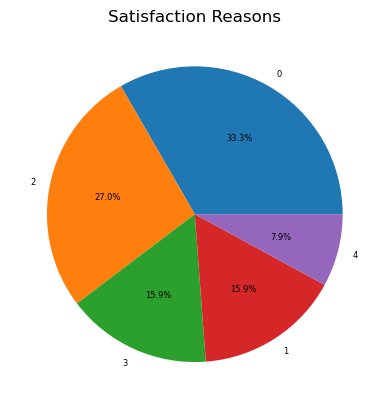

In [81]:
SC_counts = df["Satisfaction Cluster"].value_counts()

plt.pie(SC_counts, labels=SC_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Satisfaction Reasons')
plt.show()

In [82]:
SC_counts

0    21
2    17
3    10
1    10
4     5
Name: Satisfaction Cluster, dtype: int64

In [83]:
#Dissatisfaction Analysis

In [84]:
data2 = ["No smooth way to the next song ", "nan", '-',
       'it is sometimes buggy',
       'I would like better tailored suggestions and I wish there were more stats available as with Spotify and the ability to compare/share playlists with friends ',
       'Notifications aren’t accurate and are hit or miss when wanting to be notified about new podcast releases.',
       'it is hard to find new music that is actually to my taste on the platform itself',
       'lots of good playlists are found on other platforms and can‘t be transferred, from time to time, songs are taken offline/disappear',
       'Lack of unlicensed music ', 'Price per Usage is to high ',
       'many suggested playlists are not relevant and I cannot stop the recommendations showing up, individual songs in blend cannot be deleted',
       'There could be better recommendations ',
       'SoundCloud features: amateurs and wider catalog', 'Expensive ',
       'It is relatively pricey ',
       'Streaming quality could be better, Apple Music for example has better quality ',
       'The song titles are not displayed in their native language ',
       'I would like them to improve the folders for playlists. It’s messy and hard to use. For non-students the price is high.  The new ai DJ feature on spotify is bad and keeps playing the same songs over and over again. ',
       'Certain songs are missing', '- ',
       'Spotify have unethical buisness practices and exploit small artists',
       'Spotify has better podcasts',
       'I can’t share or create playlists with Spotify users in group setting',
       'I have the feeling that sometimes not all songs can be streamed on Apple Music. Especially songs or albums from artists that aren’t maybe as famous yet. ',
       'i have to pay',
       'Spotify has a very small range of Classical Music',
       'It doesn’t have a good yearly wrap up system ',
       'Very few audiobooks',
       'there is ads but i am aware that this wouldn’t be an issue if i paid for it',
       'Sometimes the algorithm could be better at suggesting new songs that I could like',
       'Lack of playlist in comparison to e.g. Spotify ',
       'Occasional technical errors (playback not available until restart)',
       'Certain remixes or unreleased songs aren’t on Spotify',
       'Choice is bad', 'Very limited usability']

y_df = pd.DataFrame(data2, columns=["Reasons for Dissatisfaction"])

In [85]:
vectorizer = TfidfVectorizer(stop_words='english')
kmeans = KMeans(n_clusters=5, random_state=42)
svd = TruncatedSVD(n_components=2)  

pipeline = make_pipeline(vectorizer, svd, kmeans)

y_df['Dissatisfaction Cluster'] = pipeline.fit_predict(y_df["Reasons for Dissatisfaction"])

print(y_df[['Reasons for Dissatisfaction', 'Dissatisfaction Cluster']])

C:\Users\CZ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CZ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                          Reasons for Dissatisfaction  Dissatisfaction Cluster
0                     No smooth way to the next song                         0
1                                                 nan                        0
2                                                   -                        0
3                               it is sometimes buggy                        0
4   I would like better tailored suggestions and I...                        4
5   Notifications aren’t accurate and are hit or m...                        3
6   it is hard to find new music that is actually ...                        3
7   lots of good playlists are found on other plat...                        3
8                           Lack of unlicensed music                         3
9                         Price per Usage is to high                         0
10  many suggested playlists are not relevant and ...                        3
11             There could be better recommendations

In [86]:
customers_df['Dissatisfaction Clusters'] = ""
customers_df

C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\210581956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df['Dissatisfaction Clusters'] = ""


,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters,Dissatisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,0,
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2,
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2,


In [87]:
#Price (expensive) and limited usability
cluster_0_dataY = y_df[y_df['Dissatisfaction Cluster'] == 0]
cluster_0_dataY

,Reasons for Dissatisfaction,Dissatisfaction Cluster
0,No smooth way to the next song,0
1,nan,0
2,-,0
3,it is sometimes buggy,0
9,Price per Usage is to high,0
12,SoundCloud features: amateurs and wider catalog,0
13,Expensive,0
14,It is relatively pricey,0
16,The song titles are not displayed in their nat...,0
19,-,0


In [88]:
cluster0_lstY = cluster_0_dataY["Reasons for Dissatisfaction"].unique()
cluster0_lstY

array(['No smooth way to the next song ', 'nan', '-',
       'it is sometimes buggy', 'Price per Usage is to high ',
       'SoundCloud features: amateurs and wider catalog', 'Expensive ',
       'It is relatively pricey ',
       'The song titles are not displayed in their native language ',
       '- ', 'i have to pay',
       'It doesn’t have a good yearly wrap up system ',
       'Very few audiobooks',
       'there is ads but i am aware that this wouldn’t be an issue if i paid for it',
       'Occasional technical errors (playback not available until restart)',
       'Choice is bad', 'Very limited usability'], dtype=object)

In [89]:
customers_df.loc[customers_df['Reasons for Dissatisfaction'].isin(cluster0_lstY), 'Dissatisfaction Clusters'] = 0
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters,Dissatisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,0
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,0,0
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2,0
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2,0


In [90]:
#Limited Soundtracks and Genres
cluster_1_dataY = y_df[y_df['Dissatisfaction Cluster'] == 1]
cluster_1_dataY

,Reasons for Dissatisfaction,Dissatisfaction Cluster
29,Sometimes the algorithm could be better at sug...,1


In [91]:
cluster1_lstY = cluster_1_dataY["Reasons for Dissatisfaction"].unique()
cluster1_lstY

array(['Sometimes the algorithm could be better at suggesting new songs that I could like'],
      dtype=object)

In [92]:
customers_df.loc[customers_df['Reasons for Dissatisfaction'].isin(cluster1_lstY), 'Dissatisfaction Clusters'] = 1
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters,Dissatisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,0
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,0,0
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2,0
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2,0


In [93]:
#Limited Exclusiveness and Features
cluster_2_dataY = y_df[y_df['Dissatisfaction Cluster'] == 2]
cluster_2_dataY

,Reasons for Dissatisfaction,Dissatisfaction Cluster
18,Certain songs are missing,2
23,I have the feeling that sometimes not all song...,2
32,Certain remixes or unreleased songs aren’t on ...,2


In [94]:
cluster2_lstY = cluster_2_dataY["Reasons for Dissatisfaction"].unique()
cluster2_lstY

array(['Certain songs are missing',
       'I have the feeling that sometimes not all songs can be streamed on Apple Music. Especially songs or albums from artists that aren’t maybe as famous yet. ',
       'Certain remixes or unreleased songs aren’t on Spotify'],
      dtype=object)

In [95]:
customers_df.loc[customers_df['Reasons for Dissatisfaction'].isin(cluster2_lstY), 'Dissatisfaction Clusters'] = 2
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters,Dissatisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,0
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,0,0
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2,0
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2,0


In [96]:
#Lacking Audio and Recommendations Quality 
cluster_3_dataY = y_df[y_df['Dissatisfaction Cluster'] == 3]
cluster_3_dataY

,Reasons for Dissatisfaction,Dissatisfaction Cluster
5,Notifications aren’t accurate and are hit or m...,3
6,it is hard to find new music that is actually ...,3
7,lots of good playlists are found on other plat...,3
8,Lack of unlicensed music,3
10,many suggested playlists are not relevant and ...,3
17,I would like them to improve the folders for p...,3
20,Spotify have unethical buisness practices and ...,3
22,I can’t share or create playlists with Spotify...,3
25,Spotify has a very small range of Classical Music,3
30,Lack of playlist in comparison to e.g. Spotify,3


In [97]:
cluster3_lstY = cluster_3_dataY["Reasons for Dissatisfaction"].unique()
cluster3_lstY

array(['Notifications aren’t accurate and are hit or miss when wanting to be notified about new podcast releases.',
       'it is hard to find new music that is actually to my taste on the platform itself',
       'lots of good playlists are found on other platforms and can‘t be transferred, from time to time, songs are taken offline/disappear',
       'Lack of unlicensed music ',
       'many suggested playlists are not relevant and I cannot stop the recommendations showing up, individual songs in blend cannot be deleted',
       'I would like them to improve the folders for playlists. It’s messy and hard to use. For non-students the price is high.  The new ai DJ feature on spotify is bad and keeps playing the same songs over and over again. ',
       'Spotify have unethical buisness practices and exploit small artists',
       'I can’t share or create playlists with Spotify users in group setting',
       'Spotify has a very small range of Classical Music',
       'Lack of playlist i

In [98]:
customers_df.loc[customers_df['Reasons for Dissatisfaction'].isin(cluster3_lstY), 'Dissatisfaction Clusters'] = 3
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters,Dissatisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,0
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,0,0
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2,0
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2,0


In [99]:
#Insufficient Personalization and Inaccurate Notifications
cluster_4_dataY = y_df[y_df['Dissatisfaction Cluster'] == 4]
cluster_4_dataY

,Reasons for Dissatisfaction,Dissatisfaction Cluster
4,I would like better tailored suggestions and I...,4
11,There could be better recommendations,4
15,"Streaming quality could be better, Apple Music...",4
21,Spotify has better podcasts,4


In [100]:
cluster4_lstY = cluster_4_dataY["Reasons for Dissatisfaction"].unique()
cluster4_lstY

array(['I would like better tailored suggestions and I wish there were more stats available as with Spotify and the ability to compare/share playlists with friends ',
       'There could be better recommendations ',
       'Streaming quality could be better, Apple Music for example has better quality ',
       'Spotify has better podcasts'], dtype=object)

In [101]:
customers_df.loc[customers_df['Reasons for Dissatisfaction'].isin(cluster4_lstY), 'Dissatisfaction Clusters'] = 4
customers_df

,Gender,Age Group,Residence,Music Streaming Subscription,Music Streaming Platform,Reasons for Platform,Subscription Model,Music Streaming Frequency,Music Streaming Devices,Music Streaming Occasions,...,Exact Search and Discovery,Enhances Artist Pages,User Reviews and Ratings,Launch a Mix,Change Country Recommendations,Flow,Song Catcher,Music Quiz,Satisfaction Clusters,Dissatisfaction Clusters
0,Female,16-24,Ireland,Yes,Apple Music,Price;Selection of music and artists;Easy usag...,Premium (Family),Multiple times a day,Smart Watch;Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,0
1,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Popularity of p...,Premium (Student),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Nice-to-have,Don´t need it,Don´t need it,Must-have,Nice-to-have,Nice-to-have,,
2,Female,16-24,Ireland,Yes,Spotify,Feature variety;Easy usage;Popularity of platf...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Don´t need it,Don´t need it,Must-have,Must-have,Must-have,Nice-to-have,Don´t need it,0,0
3,Male,16-24,Ireland,Yes,Spotify,Price;Selection of music and artists;Popularit...,Premium (Individual),Multiple times a day,Phone;Laptop;iPad or Tablet,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Must-have,Don´t need it,2,
4,Male,45-54,Germany,Yes,Deezer,Subscription plan,Premium (Family),Once a week,iPad or Tablet,Party,...,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Female,16-24,Germany,Yes,Spotify,Feature variety;Selection of music and artists...,Premium (Duo),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Don´t need it,Must-have,Nice-to-have,Don´t need it,,
122,Female,16-24,Germany,Yes,Spotify,Selection of music and artists;Easy usage;Popu...,Premium (Family),Multiple times a day,Phone,During car rides;During rides with public tran...,...,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Don´t need it,,
123,Female,45-54,Germany,Yes,Spotify,Price;Easy usage,Free,Rarely,iPad or Tablet,Free time;Party,...,Must-have,Nice-to-have,Nice-to-have,Must-have,Nice-to-have,Nice-to-have,Nice-to-have,Don´t need it,2,0
124,Male,45-54,Germany,Yes,Amazon Music,Easy usage,Free,A few times a month,Sonos,Household work,...,Must-have,Nice-to-have,Nice-to-have,Don´t need it,Don´t need it,Nice-to-have,Nice-to-have,Nice-to-have,2,0


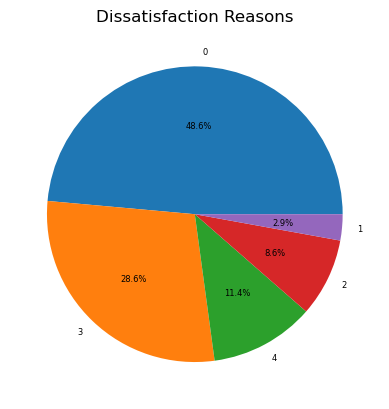

In [102]:
DSC_counts = y_df["Dissatisfaction Cluster"].value_counts()

plt.pie(DSC_counts, labels=DSC_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Dissatisfaction Reasons')
plt.show()

In [103]:
DSC_counts

0    17
3    10
4     4
2     3
1     1
Name: Dissatisfaction Cluster, dtype: int64

In [104]:
PS_counts = customers_df["Platform Satisfaction"].value_counts()
PS_counts

5.0    64
4.0    47
3.0     4
2.0     1
Name: Platform Satisfaction, dtype: int64

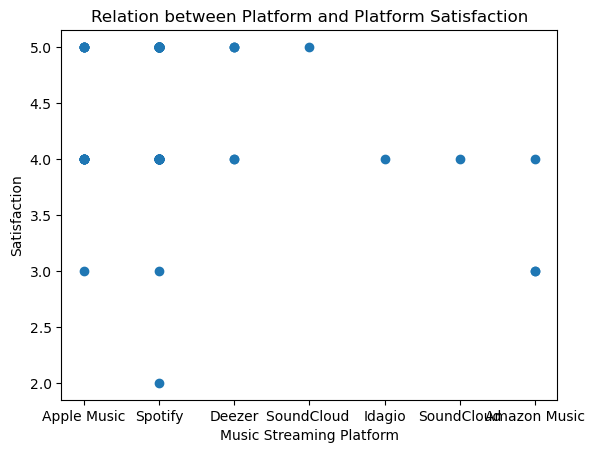

In [105]:
plt.scatter(customers_df["Music Streaming Platform"], customers_df["Platform Satisfaction"])
plt.title("Relation between Platform and Platform Satisfaction")
plt.xlabel("Music Streaming Platform")
plt.ylabel("Satisfaction")
plt.show()

In [106]:
#SoundCloud is two-times in the x-axis
customers_df["Music Streaming Platform"].unique()

array(['Apple Music', 'Spotify', 'Deezer', 'SoundCloud ', 'Idagio',
       'SoundCloud', 'Amazon Music'], dtype=object)

In [107]:
customers_df["Music Streaming Platform"].replace('SoundCloud ', "SoundCloud", inplace = True)
customers_df["Music Streaming Platform"].unique()

C:\Users\CZ\AppData\Local\Temp\ipykernel_53640\3037127083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df["Music Streaming Platform"].replace('SoundCloud ', "SoundCloud", inplace = True)


array(['Apple Music', 'Spotify', 'Deezer', 'SoundCloud', 'Idagio',
       'Amazon Music'], dtype=object)

In [108]:
satisfaction_counts = customers_df.groupby(["Music Streaming Platform", "Platform Satisfaction"]).size().reset_index(name='Count')
satisfaction_counts

,Music Streaming Platform,Platform Satisfaction,Count
0,Amazon Music,3.0,2
1,Amazon Music,4.0,1
2,Apple Music,3.0,1
3,Apple Music,4.0,9
4,Apple Music,5.0,6
5,Deezer,4.0,2
6,Deezer,5.0,3
7,Idagio,4.0,1
8,SoundCloud,4.0,1
9,SoundCloud,5.0,1


In [109]:
import seaborn as sns

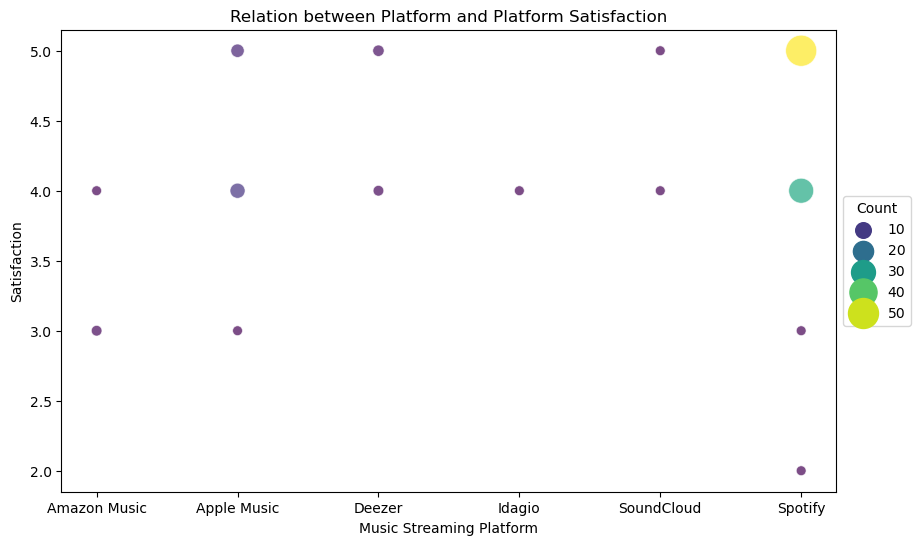

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=satisfaction_counts,
    x="Music Streaming Platform",
    y="Platform Satisfaction",
    size="Count",
    hue="Count",  
    palette="viridis",
    sizes=(50, 500),  
    alpha=0.7)

plt.title("Relation between Platform and Platform Satisfaction")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Count")
plt.xlabel("Music Streaming Platform")
plt.ylabel("Satisfaction")
plt.show()

In [111]:
sc_counts = customers_df.groupby(["Music Streaming Platform", "Satisfaction Clusters"]).size().reset_index(name='Count')
sc_counts

,Music Streaming Platform,Satisfaction Clusters,Count
0,Amazon Music,2,1
1,Amazon Music,,2
2,Apple Music,0,6
3,Apple Music,1,2
4,Apple Music,2,3
5,Apple Music,3,3
6,Apple Music,4,1
7,Apple Music,,1
8,Deezer,1,1
9,Deezer,,4


In [112]:
sc_counts = sc_counts[sc_counts['Satisfaction Clusters'] != '']
sc_counts

,Music Streaming Platform,Satisfaction Clusters,Count
0,Amazon Music,2,1
2,Apple Music,0,6
3,Apple Music,1,2
4,Apple Music,2,3
5,Apple Music,3,3
6,Apple Music,4,1
8,Deezer,1,1
10,Idagio,3,1
11,SoundCloud,3,1
13,Spotify,0,15


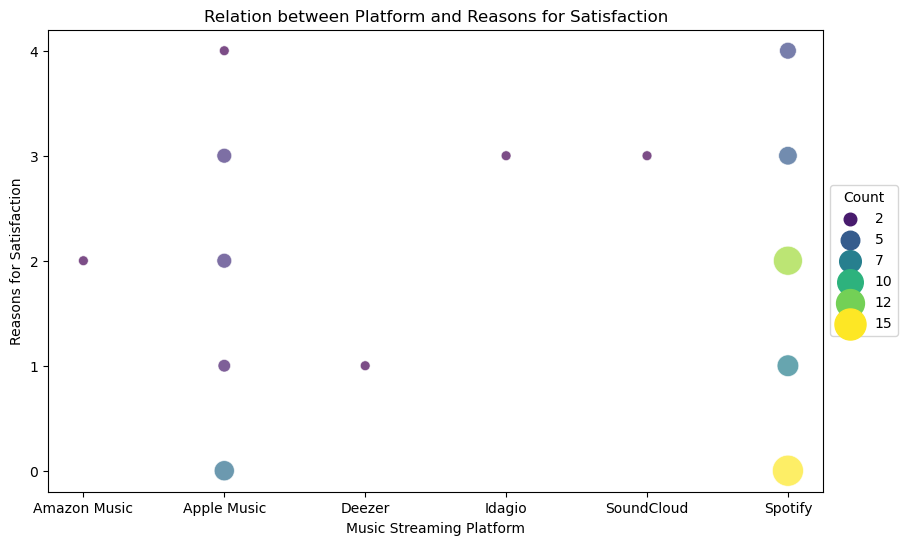

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sc_counts,
    x="Music Streaming Platform",
    y=sc_counts["Satisfaction Clusters"].astype(int),
    size="Count",
    hue="Count",  
    palette="viridis",
    sizes=(50, 500),  
    alpha=0.7)

plt.title("Relation between Platform and Reasons for Satisfaction")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Count")
plt.xlabel("Music Streaming Platform")
plt.ylabel("Reasons for Satisfaction")
plt.yticks(range(sc_counts["Satisfaction Clusters"].astype(int).min(), sc_counts["Satisfaction Clusters"].astype(int).max() + 1))
plt.show()

In [114]:
dsc_counts = customers_df.groupby(["Music Streaming Platform", "Dissatisfaction Clusters"]).size().reset_index(name='Count')
dsc_counts

,Music Streaming Platform,Dissatisfaction Clusters,Count
0,Amazon Music,0,1
1,Amazon Music,,2
2,Apple Music,0,4
3,Apple Music,2,1
4,Apple Music,3,3
5,Apple Music,4,3
6,Apple Music,,5
7,Deezer,0,1
8,Deezer,,4
9,Idagio,3,1


In [115]:
dsc_counts = dsc_counts[dsc_counts['Dissatisfaction Clusters'] != '']
dsc_counts

,Music Streaming Platform,Dissatisfaction Clusters,Count
0,Amazon Music,0,1
2,Apple Music,0,4
3,Apple Music,2,1
4,Apple Music,3,3
5,Apple Music,4,3
7,Deezer,0,1
9,Idagio,3,1
10,SoundCloud,0,1
12,Spotify,0,9
13,Spotify,1,1


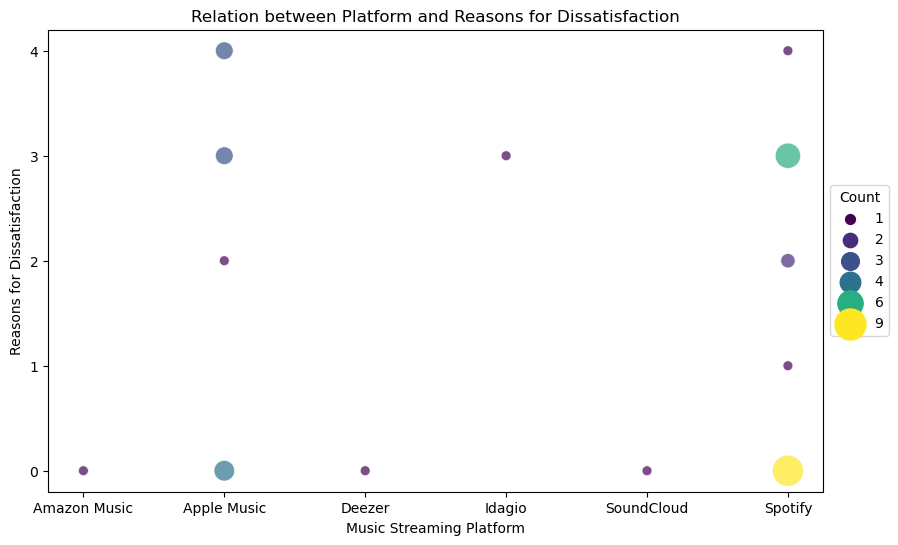

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dsc_counts,
    x="Music Streaming Platform",
    y=dsc_counts["Dissatisfaction Clusters"].astype(int),
    size="Count",
    hue="Count",  
    palette="viridis",
    sizes=(50, 500),  
    alpha=0.7)

plt.title("Relation between Platform and Reasons for Dissatisfaction")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Count")
plt.xlabel("Music Streaming Platform")
plt.ylabel("Reasons for Dissatisfaction")
plt.yticks(range(dsc_counts["Dissatisfaction Clusters"].astype(int).min(), dsc_counts["Dissatisfaction Clusters"].astype(int).max() + 1))
plt.show()

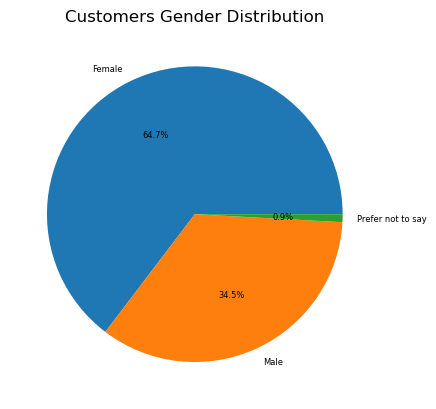

In [117]:
c_gender_counts = customers_df["Gender"].value_counts()

plt.pie(c_gender_counts, labels=c_gender_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Customers Gender Distribution')
plt.show()

In [118]:
c_gender_counts

Female               75
Male                 40
Prefer not to say     1
Name: Gender, dtype: int64

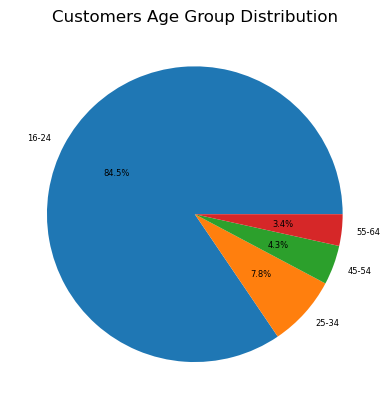

In [119]:
c_age_counts = customers_df["Age Group"].value_counts()

plt.pie(c_age_counts, labels=c_age_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Customers Age Group Distribution')
plt.show()

In [120]:
c_age_counts

16-24    98
25-34     9
45-54     5
55-64     4
Name: Age Group, dtype: int64

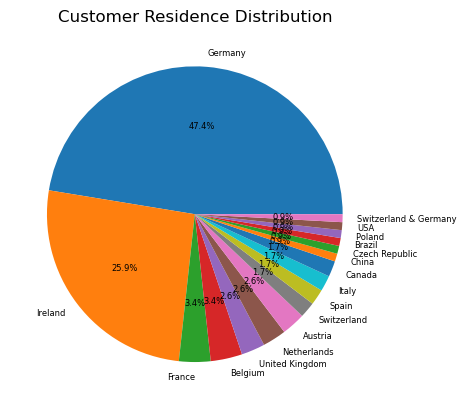

In [121]:
c_residence_counts = customers_df["Residence"].value_counts()

plt.pie(c_residence_counts, labels=c_residence_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Customer Residence Distribution')
plt.show()

In [122]:
c_residence_counts

Germany                  55
Ireland                  30
France                    4
Belgium                   4
United Kingdom            3
Netherlands               3
Austria                   3
Switzerland               2
Spain                     2
Italy                     2
Canada                    2
China                     1
Czech Republic            1
Brazil                    1
Poland                    1
USA                       1
Switzerland & Germany     1
Name: Residence, dtype: int64

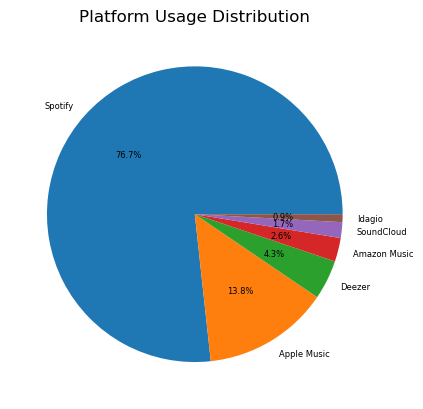

In [123]:
platforms_counts = customers_df["Music Streaming Platform"].value_counts()

plt.pie(platforms_counts, labels=platforms_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Platform Usage Distribution')
plt.show()

In [124]:
platforms_counts

Spotify         89
Apple Music     16
Deezer           5
Amazon Music     3
SoundCloud       2
Idagio           1
Name: Music Streaming Platform, dtype: int64

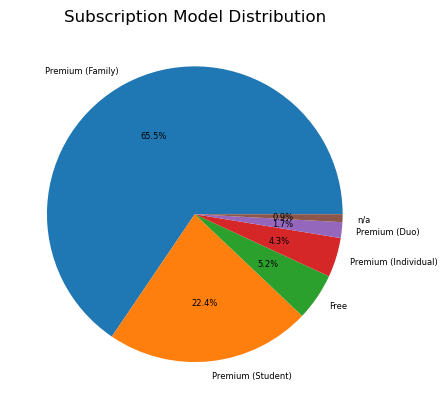

In [125]:
SM_counts = customers_df["Subscription Model"].value_counts()

plt.pie(SM_counts, labels=SM_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Subscription Model Distribution')
plt.show()

In [126]:
SM_counts

Premium (Family)        76
Premium (Student)       26
Free                     6
Premium (Individual)     5
Premium (Duo)            2
n/a                      1
Name: Subscription Model, dtype: int64

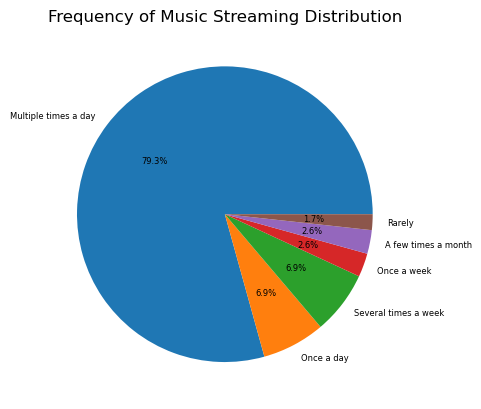

In [127]:
frequency_counts = customers_df["Music Streaming Frequency"].value_counts()

plt.pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Frequency of Music Streaming Distribution')
plt.show()

In [128]:
frequency_counts

Multiple times a day    92
Once a day               8
Several times a week     8
Once a week              3
A few times a month      3
Rarely                   2
Name: Music Streaming Frequency, dtype: int64

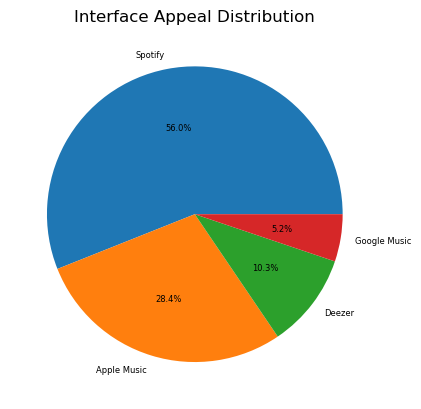

In [129]:
interface_counts = customers_df["Interface Appeal"].value_counts()

plt.pie(interface_counts, labels=interface_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Interface Appeal Distribution')
plt.show()

In [130]:
interface_counts

Spotify         65
Apple Music     33
Deezer          12
Google Music     6
Name: Interface Appeal, dtype: int64

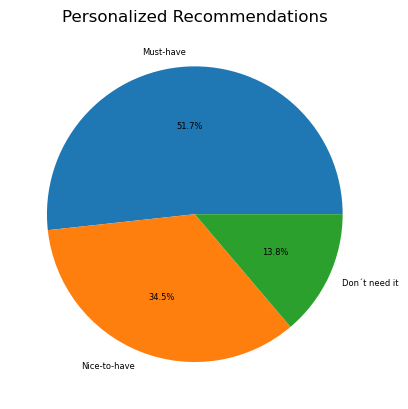

In [131]:
feature1_counts = customers_df["Personalized Recommendations"].value_counts()

plt.pie(feature1_counts, labels=feature1_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title('Personalized Recommendations')
plt.show()

In [132]:
feature1_counts

Must-have        60
Nice-to-have     40
Don´t need it    16
Name: Personalized Recommendations, dtype: int64

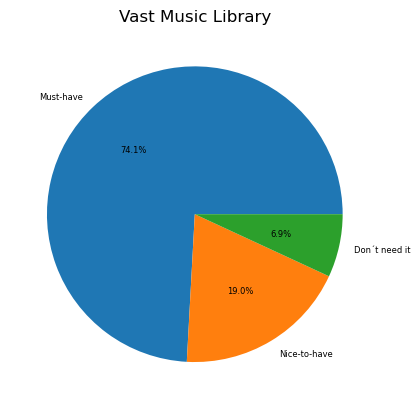

In [133]:
feature2_counts = customers_df["Vast Music Library"].value_counts()

plt.pie(feature2_counts, labels=feature2_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Vast Music Library")
plt.show()

In [134]:
feature2_counts

Must-have        86
Nice-to-have     22
Don´t need it     8
Name: Vast Music Library, dtype: int64

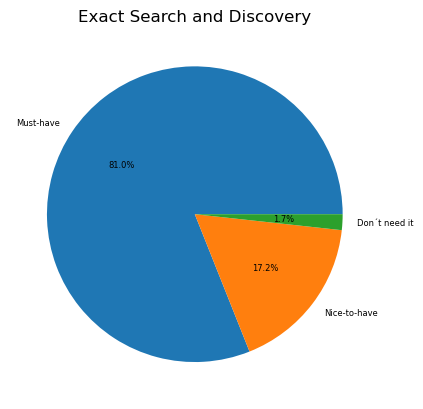

In [135]:
feature3_counts = customers_df["Exact Search and Discovery"].value_counts()

plt.pie(feature3_counts, labels=feature3_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Exact Search and Discovery")
plt.show()

In [136]:
feature3_counts

Must-have        94
Nice-to-have     20
Don´t need it     2
Name: Exact Search and Discovery, dtype: int64

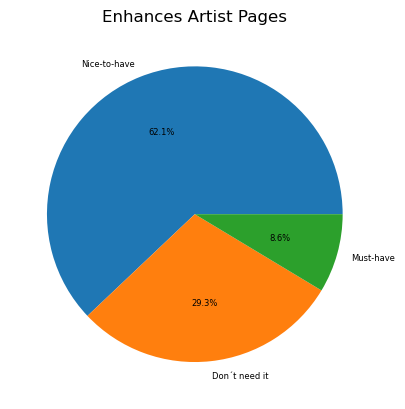

In [137]:
feature4_counts = customers_df["Enhances Artist Pages"].value_counts()

plt.pie(feature4_counts, labels=feature4_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Enhances Artist Pages")
plt.show()

In [138]:
feature4_counts

Nice-to-have     72
Don´t need it    34
Must-have        10
Name: Enhances Artist Pages, dtype: int64

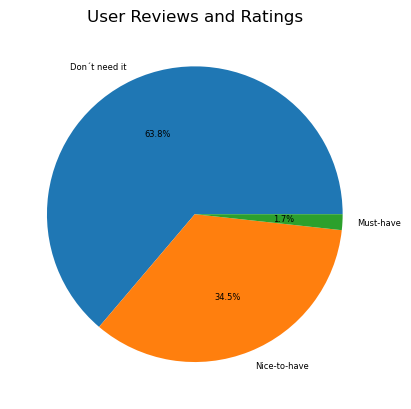

In [139]:
feature5_counts = customers_df["User Reviews and Ratings"].value_counts()

plt.pie(feature5_counts, labels=feature5_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("User Reviews and Ratings")
plt.show()

In [140]:
feature5_counts

Don´t need it    74
Nice-to-have     40
Must-have         2
Name: User Reviews and Ratings, dtype: int64

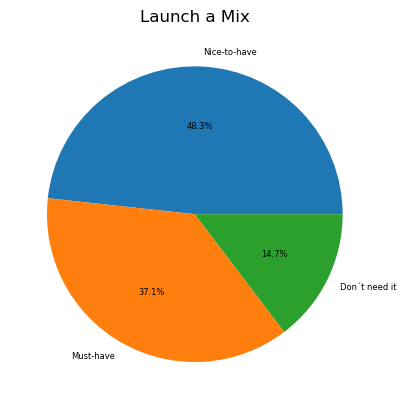

In [141]:
feature6_counts = customers_df["Launch a Mix"].value_counts()

plt.pie(feature6_counts, labels=feature6_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Launch a Mix")
plt.show()

In [142]:
feature6_counts

Nice-to-have     56
Must-have        43
Don´t need it    17
Name: Launch a Mix, dtype: int64

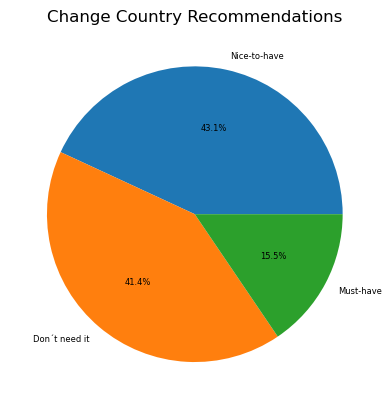

In [143]:
feature7_counts = customers_df["Change Country Recommendations"].value_counts()

plt.pie(feature7_counts, labels=feature7_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Change Country Recommendations")
plt.show()

In [144]:
feature7_counts

Nice-to-have     50
Don´t need it    48
Must-have        18
Name: Change Country Recommendations, dtype: int64

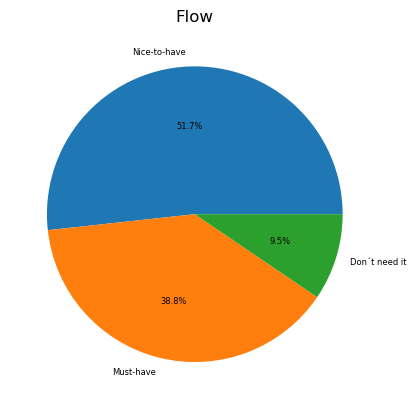

In [145]:
feature8_counts = customers_df["Flow"].value_counts()

plt.pie(feature8_counts, labels=feature8_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Flow")
plt.show()

In [146]:
feature8_counts

Nice-to-have     60
Must-have        45
Don´t need it    11
Name: Flow, dtype: int64

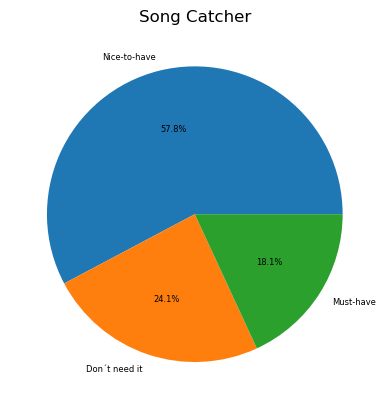

In [147]:
feature9_counts = customers_df["Song Catcher"].value_counts()

plt.pie(feature9_counts, labels=feature9_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Song Catcher")
plt.show()

In [148]:
feature9_counts

Nice-to-have     67
Don´t need it    28
Must-have        21
Name: Song Catcher, dtype: int64

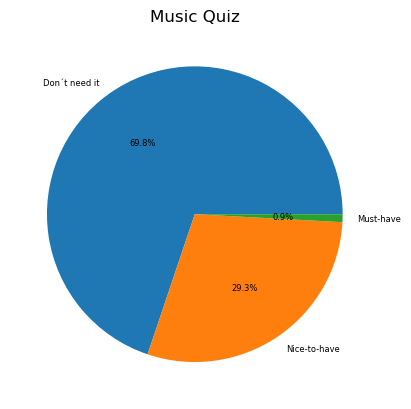

In [149]:
feature10_counts = customers_df["Music Quiz"].value_counts()

plt.pie(feature10_counts, labels=feature10_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Music Quiz")
plt.show()

In [150]:
feature10_counts

Don´t need it    81
Nice-to-have     34
Must-have         1
Name: Music Quiz, dtype: int64

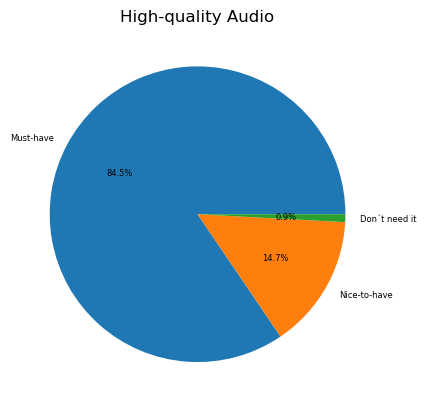

In [151]:
feature11_counts = customers_df["High-quality Audio"].value_counts()

plt.pie(feature11_counts, labels=feature11_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("High-quality Audio")
plt.show()

In [152]:
feature11_counts

Must-have        98
Nice-to-have     17
Don´t need it     1
Name: High-quality Audio, dtype: int64

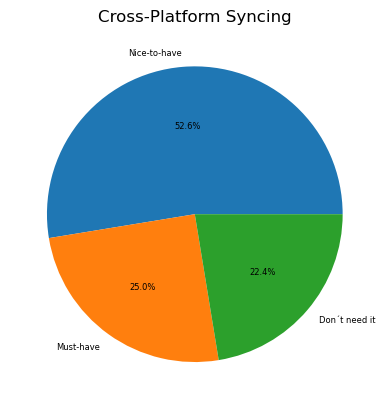

In [153]:
feature12_counts = customers_df["Cross-Platform Syncing"].value_counts()

plt.pie(feature12_counts, labels=feature12_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Cross-Platform Syncing")
plt.show()

In [154]:
feature12_counts

Nice-to-have     61
Must-have        29
Don´t need it    26
Name: Cross-Platform Syncing, dtype: int64

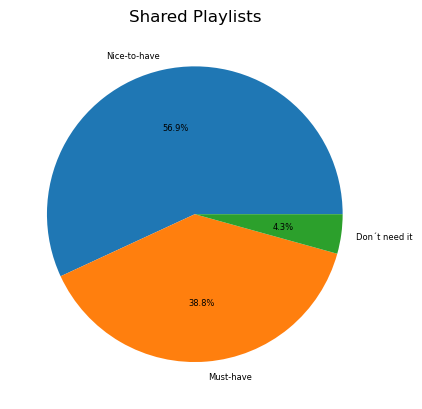

In [155]:
feature13_counts = customers_df["Shared Playlists"].value_counts()

plt.pie(feature13_counts, labels=feature13_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Shared Playlists")
plt.show()

In [156]:
feature13_counts

Nice-to-have     66
Must-have        45
Don´t need it     5
Name: Shared Playlists, dtype: int64

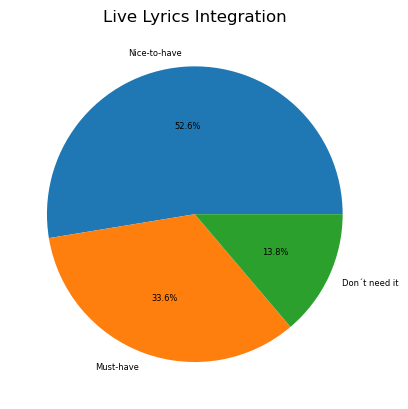

In [157]:
feature14_counts = customers_df["Live Lyrics Integration"].value_counts()

plt.pie(feature14_counts, labels=feature14_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Live Lyrics Integration")
plt.show()

In [158]:
feature14_counts

Nice-to-have     61
Must-have        39
Don´t need it    16
Name: Live Lyrics Integration, dtype: int64

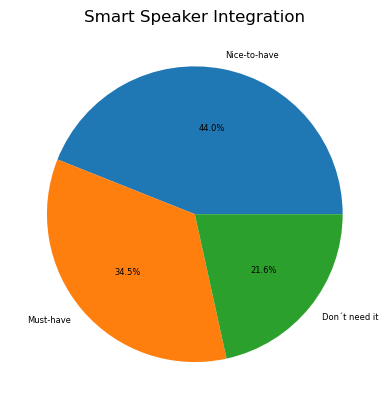

In [159]:
feature15_counts = customers_df["Smart Speaker Integration"].value_counts()

plt.pie(feature15_counts, labels=feature15_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Smart Speaker Integration")
plt.show()

In [160]:
feature15_counts

Nice-to-have     51
Must-have        40
Don´t need it    25
Name: Smart Speaker Integration, dtype: int64

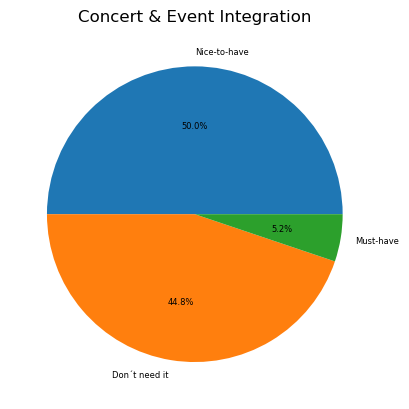

In [161]:
feature16_counts = customers_df["Concert & Event Integration"].value_counts()

plt.pie(feature16_counts, labels=feature16_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Concert & Event Integration")
plt.show()

In [162]:
feature16_counts

Nice-to-have     58
Don´t need it    52
Must-have         6
Name: Concert & Event Integration, dtype: int64

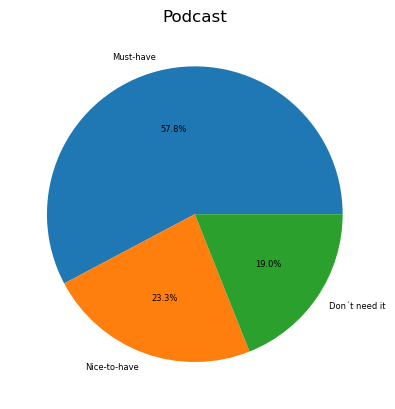

In [163]:
feature17_counts = customers_df["Podcast"].value_counts()

plt.pie(feature17_counts, labels=feature17_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Podcast")
plt.show()

In [164]:
feature17_counts

Must-have        67
Nice-to-have     27
Don´t need it    22
Name: Podcast, dtype: int64

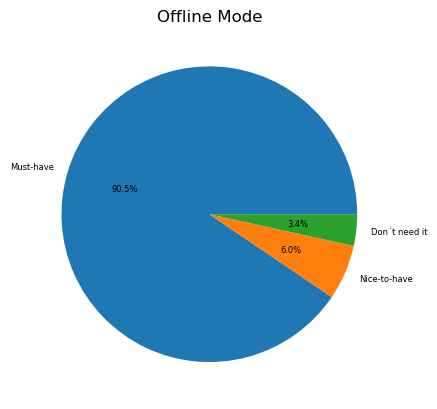

In [165]:
feature18_counts = customers_df["Offline Mode"].value_counts()

plt.pie(feature18_counts, labels=feature18_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Offline Mode")
plt.show()

In [166]:
feature18_counts

Must-have        105
Nice-to-have       7
Don´t need it      4
Name: Offline Mode, dtype: int64

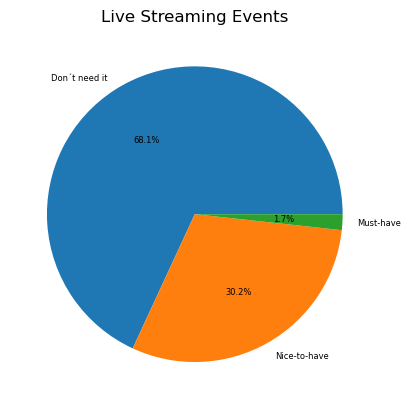

In [167]:
feature19_counts = customers_df["Live Streaming Events"].value_counts()

plt.pie(feature19_counts, labels=feature19_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Live Streaming Events")
plt.show()

In [168]:
feature19_counts

Don´t need it    79
Nice-to-have     35
Must-have         2
Name: Live Streaming Events, dtype: int64

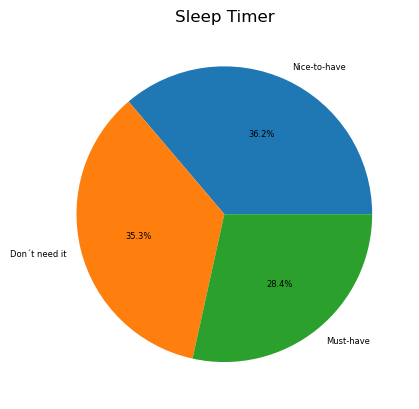

In [169]:
feature20_counts = customers_df["Sleep Timer"].value_counts()

plt.pie(feature20_counts, labels=feature20_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Sleep Timer")
plt.show()

In [170]:
feature20_counts

Nice-to-have     42
Don´t need it    41
Must-have        33
Name: Sleep Timer, dtype: int64

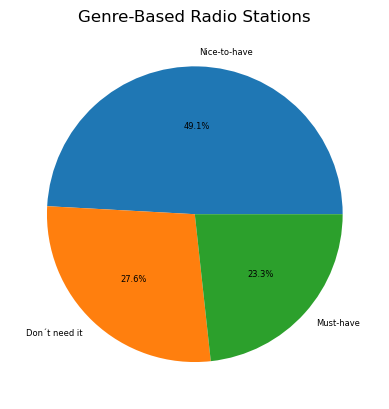

In [171]:
feature21_counts = customers_df["Genre-Based Radio Stations"].value_counts()

plt.pie(feature21_counts, labels=feature21_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Genre-Based Radio Stations")
plt.show()

In [172]:
feature21_counts

Nice-to-have     57
Don´t need it    32
Must-have        27
Name: Genre-Based Radio Stations, dtype: int64

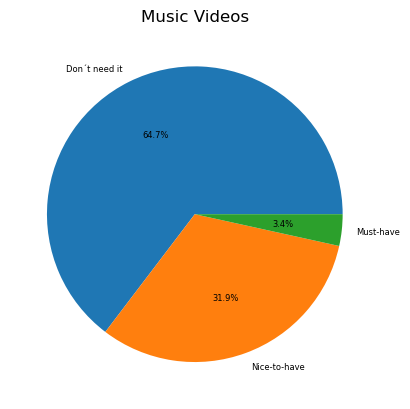

In [173]:
feature22_counts = customers_df["Music Videos"].value_counts()

plt.pie(feature22_counts, labels=feature22_counts.index, autopct='%1.1f%%', textprops={'fontsize':6})
plt.title("Music Videos")
plt.show()

In [174]:
feature22_counts

Don´t need it    75
Nice-to-have     37
Must-have         4
Name: Music Videos, dtype: int64